# The Heat Equation

We want to compute the 1D solution of the heat equation. This is a partial differential equation (PDE) given by:

$$\frac{\partial  f}{\partial t} = \chi \frac{\partial ^ 2 f}{\partial x ^2}$$

We need to specify the boundary conditions. In our particular case we are going to choose that is zero at the boundaries for $x = [0, L]$:

$$f(0, t) = f(L, t) =0$$

We also need to specify the conditions at $t=0$. 

$$f(x,0) = f_0(x) = \sin(\frac{\pi x}{L})$$

## Finite Difference Method

Finite difference are numerical methods to solve partial differential equations. The idea is to approximate the solution discrete zing the problem, i.e. replace continuous derivatives with formulas that involve only the discrete values $\Delta x$ and $\Delta t$. The finite difference method obtains an approximate solution for $T(x, t)$ at a finite set of x and t. 

### Mesh
The mesh is the set of locations where the discrete solution is computed. The $\Delta x$ represents the local distance between adjacent points in space, and $\Delta $t the local distance between adjacent time steps.

### Forward Time, Centered Space

We approximate the equation with a *forward difference* that only involves f at $x = x_i$:

$$\frac{\partial f(x,t)}{\partial t} \bigg |_{t_{m+1}, x_i}  = \frac {f_i ^{m+1} - f_i^{m}    }  {\Delta t} + \mathcal O (\Delta t)  $$

To approximate the term $(\partial ^2 f / \partial x ^2 )_{x_i}$ we use the central difference approximation and evaluate at time m:

$$\frac{\partial ^2 f(x,t)}{\partial x ^2} \bigg |_{x_i}  = \frac {f_{i-1} ^{m} - 2f_i^{m} + f^m_{i+1}    }  {\Delta x ^2} + \mathcal O (\Delta x^2)  $$


We substitute in the heat equation and get:


$$\frac {f_i ^{m+1} - f_i^{m}    }  {\Delta t} = \chi \, \frac {f_{i-1} ^{m} - 2f_i^{m} + f^m_{i+1}    }  {\Delta x ^2} + \mathcal O (\Delta t) + \mathcal O (\Delta x^2)$$

We solve for $f^{m+1}_i$ and get:

$$  f^{m+1} _ i = f^m _i + \frac{\chi \Delta t}{\Delta x ^2} \left ( f^m _{i+1} - 2 f^m _ i + f ^ m _{i-1} \right ) $$


The last equation is called the *Forward Time, Centered Space* or FTCS approximation of the heat equation. 

## The Courant-Friedrichs-Lewy (CLF) condition:

The CLF is a necessary condition for convergence. In our case we have a variable CFL given by:

$$\text{CFL}=\frac{\chi \Delta t}{\Delta x ^2} < \frac{1}{2}$$

The equation to solve for $f^{m+1}_i$  gets the form:

$$  f^{m+1} _ i = \text{CFL} \cdot f^m_{i+1} + (1-2 \cdot \text{CFL}) f^m _i + \text{CFL} \cdot f^m _{i-1}$$

## Python Implementation

We first decide our boundaries for t and x, our CFL for stability, the radiative diffusion $\chi$, and the number of grid points, N. 

Then given L and N the spacing $dx$ between the $x_i$ is computed with:
$$\Delta x = \frac{L}{N-1}$$

Similary for the discrete time we have:

$$ \Delta t = \frac{t_{max}}{M-1} $$ 

In our case we define a CFL and we get a the $\Delta t$:

$$ \Delta t = CFL \cdot (\Delta x)^2 $$

and we get the number of intererations:

$$M = nt = \frac{t_{max}}{\Delta t} +1$$




In [472]:
cfl  =  0.25 # Courant-Friedrichs-Lewy condition
L    = 1. # x= [0, L]
N    = 100 #Gridpoints
chi  = 1 #Radiative diffusion
tend = 0.1 #Final time step

dx = L/(N-1.)
dt = cfl*(dx)**2
nt = int(tend/dt)+1
print "CFL=%5.2f tend=%4.1f --> %i iteratiobns en temps"%(cfl,tend,nt)

CFL= 0.25 tend= 0.1 --> 3921 iteratiobns en temps


Now we define the initial conditions at time zero. We create our vectors x and T0 in Python. 

$$f(x,0) = f_0(x) = \sin(\frac{\pi x}{L})$$

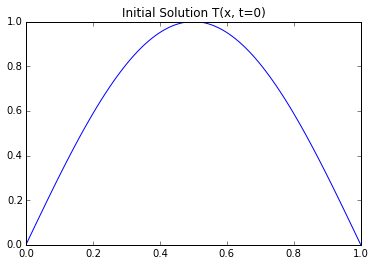

In [473]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#
# solution initiale T0(x,t=0)
#
x=np.linspace(0,L,N)
T0=np.sin((np.pi*x)/L)
plt.plot(x,T0,label='initial u')
plt.title('Initial Solution T(x, t=0)')
plt.show()

Now we do the loop:
    $$  f^{m+1} _ i = \text{CFL} \cdot f^m_{i+1} + (1-2 \cdot \text{CFL}) f^m _i + \text{CFL} \cdot f^m _{i-1}$$

We need an outer loop for all the time steps and an inner loop of the space. We can optimize the code by using the function roll from the numpy package and only need the outer time loop. 

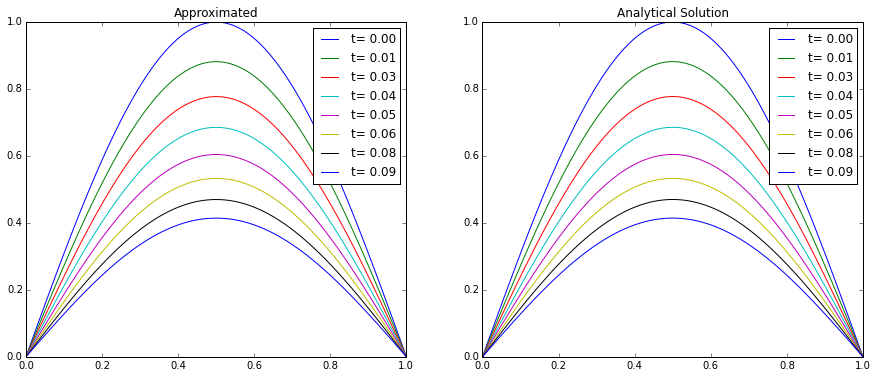

In [474]:
#
# avancement en temps u(x,t)
#
t=0. ; u=np.copy(T0)
plt.figure(figsize=(15, 6))
for i in range(0,nt):
    uold = u
    u= cfl*np.roll(uold,-1)+(1-2*cfl)*uold+ cfl*np.roll(uold,1)
    u[0]=u[-1]=0
    #u[1:N-1] = cfl*uold[0:N-2] + (1-2*cfl)*uold[1:N-1] + cfl*uold[2:N]
    uexacte= np.sin((np.pi*x)/L)*np.exp(-(chi*np.pi**2*t)/(L**2))
    t=t+dt 
    if (i % 500 == 0):  #Plot every 500 interations
        st="t=%5.2f"%t

        plt.subplot(1, 2, 1)
        plt.plot(x,u,label=st)
        plt.title('Approximated')
        plt.legend()
        
        plt.subplot(1, 2, 2)
        plt.title('Analytical Solution')
        plt.plot(x,uexacte,label=st)
        plt.legend()

We can now compare to the analytical solution:

$$T(x,t) = \sin(\frac{\pi x}{L}) \exp(-\frac{\chi \pi ^2 t}{L^2})$$

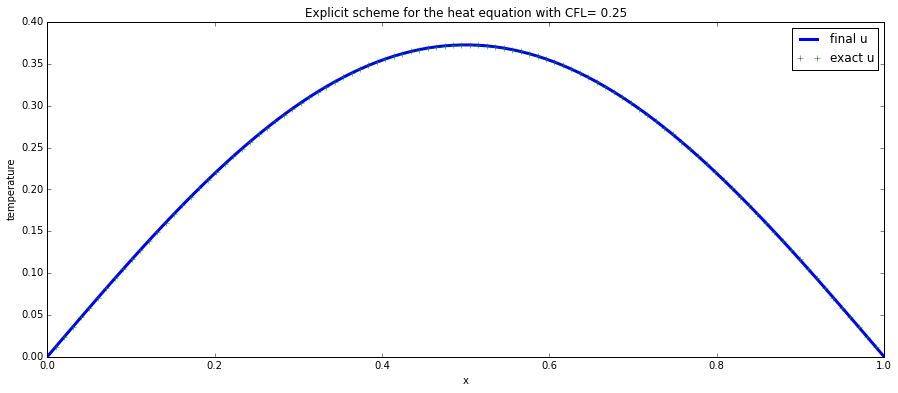

In [475]:
#
# comparaison avec la solution analytique au temps final
#
t=tend
uexacte= np.sin((np.pi*x)/L)*np.exp(-(chi*np.pi**2*t)/(L**2))

plt.figure(figsize=(15, 6))
plt.plot(x,u,label='final u',lw=3)
plt.plot(x,uexacte,'+',label='exact u')
plt.xlabel('x')
plt.ylabel('temperature')
plt.title('Explicit scheme for the heat equation with CFL=%5.2f'%cfl)
plt.legend(loc='best')

plt.show()

### Changing the CLF

In [476]:
from IPython.html.widgets import interact

def plot_heat(cfl2):
    L    = 1. # x= [0, L]
    N    = 100 #Gridpoints
    chi  = 1 #Radiative diffusion
    tend = 0.1 #Final time step

    dx = L/(N-1.)
    dt = cfl2*(dx)**2
    nt = int(tend/dt)+1
    t=0. ; u=np.copy(T0)
    plt.figure(figsize=(15, 6))
    for i in range(0,nt):
        uold = u
        #u= cfl*np.roll(uold,-1)+(1-2*cfl)*uold+ cfl*np.roll(uold,1)
        u[1:N-1] = cfl2*uold[0:N-2] + (1-2*cfl2)*uold[1:N-1] + cfl2*uold[2:N]
        uexacte= np.sin((np.pi*x)/L)*np.exp(-(chi*np.pi**2*t)/(L**2))
        t=t+dt 
        if (i % 500 == 0):  #Plot every 500 interations
            st="t=%5d"%nt

            plt.subplot(1, 2, 1)
            plt.plot(x,u,label=st)
            plt.title('Approximated with '+st+' iterations')

<function __main__.plot_heat>

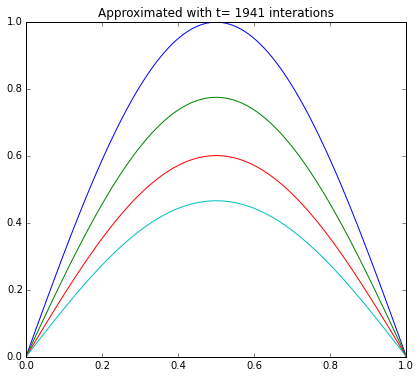

In [477]:
interact(plot_heat, cfl2 =(0.49,0.52, 0.001))

## Problem with the CFL

We notice from above that the number of iterations depends on the CFL. If we put a really small CFL we pay the price to have to compute more iterations. The other problem is that the CFL depends on $\chi$. This can be a problem in astrophysics because: 

$$\Delta t \,  \alpha \, \frac{1}{\chi}$$

To solve that we use an Implicit Schema.

# Implicit Schema

# Crank

We assume again a approximate *forward difference* solution for the left hand side of the heat equation:

$$\frac{\partial f(x,t)}{\partial t} \bigg |_{t_{m+1}, x_i}  = \frac {f_i ^{m+1} - f_i^{m}    }  {\Delta t} + \mathcal O (\Delta t)  $$

But in this case to approximate the term $(\partial ^2 f / \partial x ^2 )_{x_i}$ we use the average of the central difference approximation and evaluate at time $m$ and $m+1$:

$$\frac{\partial^{2}f(x,t)}{\partial x^{2}}\bigg|_{x_{i}}=\frac{1}{2}\left[\frac{f_{i-1}^{m+1}-2f_{i}^{m+1}+f_{i+1}^{m+1}}{\Delta x^{2}}+\frac{f_{i-1}^{m}-2f_{i}^{m}+f_{i+1}^{m}}{\Delta x^{2}}\right]$$
 


We substitute in the heat equation and get:

$$\frac {f_i ^{m+1} - f_i^{m}    }  {\Delta t} = \frac{\chi}{2 \Delta x ^2}\left[ (f_{i-1}^{m+1}-2f_{i}^{m+1}+f_{i+1}^{m+1})+(f_{i-1}^{m}-2f_{i}^{m}+f_{i+1}^{m}) \right]$$

We arrange to equation above to get in one side the ones at m and on the right side the ones at $m+1$. We remember that $\text{CLF} = \frac{\chi \Delta t}{\Delta x ^2}$ and we get:

$$ - \text{CLF} f_{i+1}^{m+1}+2(1+\text{CLF})f_{i}^{m+1}-\text{CLF}f_{i-1}^{m+1}=\text{CLF}f_{i+1}^{m}+2(1-\text{CLF})f_{i}^{m}+\text{CLF}f_{i-1}^{m}$$

We note that the equation above can be put in Matrix form:

as

$$
\left[\begin{array}{cccccc}
b_{1} & c_{1} & 0 & 0 & 0 & 0\\
a_{2} & b_{2} & c_{2} & 0 & 0 & 0\\
0 & a_{3} & b_{3} & c_{3} & 0 & 0\\
0 & 0 & \ddots & \ddots & \ddots & 0\\
0 & 0 & 0 & a_{N-1} & b_{N-1} & c_{N-1}\\
0 & 0 & 0 & 0 & 0 & b_{n}
\end{array}\right]\begin{bmatrix}f_{1}\\
f_{2}\\
f_{3}\\
\vdots\\
f_{N-1}\\
f_{N}
\end{bmatrix}=\begin{bmatrix}d_{1}\\
d_{2}\\
d_{3}\\
\vdots\\
d_{N-1}\\
d_{N}
\end{bmatrix}
$$

Where the coeeficients are the followings from $i=2,3,\dotsc, N-1$:

\begin{align}
a_i &= -\, \text{CLF} \\
b_i &= 2(1+\, \text{CLF}) \\
c_i &= -\, \text{CLF} \\
d_i &= 2(1 - \, \text{CLF}) f^m_i - a_if^m_{i-1} - c_i f^m_{i+1}
\end{align}

The boundaries conditions are:

\begin{align}
b_1 &= 1, \, b_N = 1, c_1 = 0, d_i = f_0 \\
a_N &= 0, b_N = 1, d_N = f_L 
\end{align}






CFL= 0.80 tend= 0.1 --> 1226 iteratiobns en temps


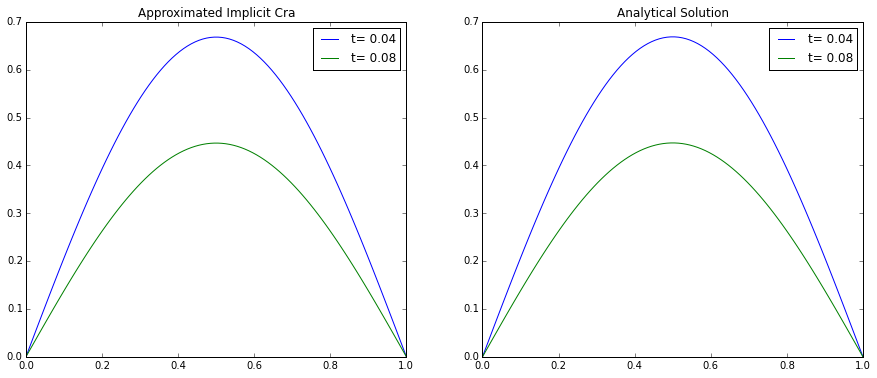

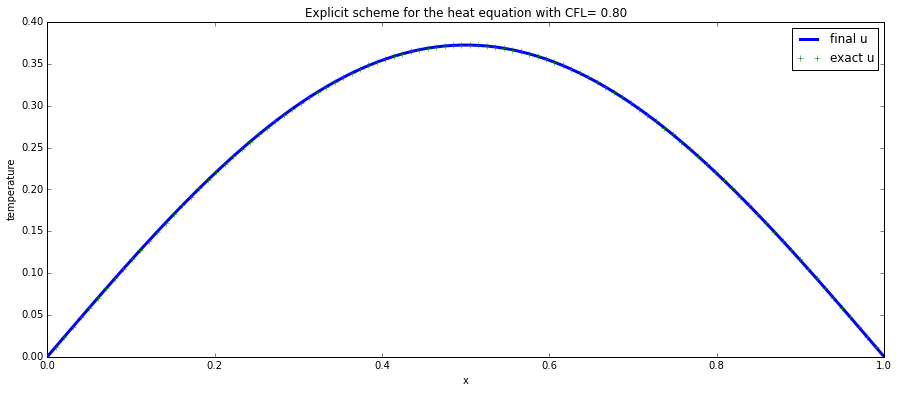

In [478]:
from tridag import tridag
# Schema implicite Implicit Crank-Nicolson
cfl  =  .8 # Courant-Friedrichs-Lewy condition
L    = 1. # x= [0, L]
N    = 100 #Gridpoints
chi  = 1 #Radiative diffusion
tend = 0.1 #Final time step

dx = L/(N-1.)
dt = cfl*(dx)**2
nt = int(tend/dt)+1
print "CFL=%5.2f tend=%4.1f --> %i iteratiobns en temps"%(cfl,tend,nt)

# Construction de la matricea tridiagonale du systeme
#A=-cfl*np.ones(N)
A=-0.5*cfl*np.ones(N)
A[-2]=0.; 

#B= 2 *(1+cfl)*np.ones(N)
B=  (1+cfl)*np.ones(N)
B[0]=1.; B[-1]=1.

C = -0.5*cfl *np.ones(N)
#C = -cfl *np.ones(N)
C[0]=0.

at = 2*(1 - cfl)*np.ones(N-1)
#at= (1 - cfl)*np.ones(N-1)


RHS = np.ones(N)

t=0. ; u=np.copy(T0)
plt.figure(figsize=(15, 6))
for i in range(1,nt+1):
    RHS = u + 0.5*cfl*(np.roll(u,-1)- 2.* u +np.roll(u,1) )
    #RHS[1:N-1] = -A[1:N-1]*u[0:N-2] + at[1:N-1]*u[1:N-1]-C[1:N-1]*u[2:N]
    RHS[0]=RHS[-1]=0.0
    u=tridag(A,B,C,RHS)
    uexacte= np.sin((np.pi*x)/L)*np.exp(-(chi*np.pi**2*t)/(L**2))
    t=t+dt 
    if (i % 500 == 0):  #Plot every 500 interations
        st="t=%5.2f"%t
        plt.subplot(1, 2, 1)
        plt.plot(x,u,label=st)
        plt.title('Approximated Implicit Cra')
        plt.legend()
        plt.subplot(1, 2, 2)
        plt.title('Analytical Solution')
        plt.plot(x,uexacte,label=st)
        plt.legend()
        
#
# comparaison avec la solution analytique au temps final
#
t=tend
uexacte= np.sin((np.pi*x)/L)*np.exp(-(chi*np.pi**2*t)/(L**2))

plt.figure(figsize=(15, 6))
plt.plot(x,u,label='final u',lw=3)
plt.plot(x,uexacte,'+',label='exact u')
plt.xlabel('x')
plt.ylabel('temperature')
plt.title('Explicit scheme for the heat equation with CFL=%5.2f'%cfl)
plt.legend(loc='best')

### The CFL in the Implicit schema

We see that this schema is unconditionally stable. It will converge even with a really big CFL. The problem would be if we put a unphysical CFL. This is due to the fact that the CFL is the ratio of the simulation time and the physical diffusion time. 

This is important to remember, for example, when we have an equation where each of the terms have a different characteristic time. For example if you have advection and diffusion you can choose an implicit schema if the diffusion time is fast and an explicit schema if the advection time is slow. 

# The advection equation

Now we try to solve the advection equation given by:

$$\frac{\partial u}{\partial t} + V \frac{\partial u}{\partial x} =0$$

We again need to specify the boundaries conditions:

$$u(0,t) = u(L,t)$$

For time $u(x,0) = \cos \left ( \frac{2\pi x}{L} \right )$.


## Exact Solution

We see that this is the wave equation in 1D. It would be initial function being displaced at a velocity V.

$$u(x, t) = \cos\left [ \frac{2 \pi}{L} (x-v\Delta t) \right ]$$

## Explicit Methods

### FTCS

We again use a *Forward in TIme, Centered in Space*. In our case now the $\text{CLF} = \frac{V \Delta t}{\Delta x}$

We get the equation:

$$\frac{u^m _{i+1} - u^m _i} {\Delta t} + c \frac{u^{m+1} _i - u^{m-1}_i}{2 \Delta x} = 0$$

Solve for $u^m_{i+1}$ and get:


$$u^m_{i+1}= u^m _i  - \frac{\text{CFL}}{2} \left ( u^{m+1}_i - u^{m-i}_i \right ) $$



In [492]:
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#
# solution initiale T0(x,t=0)
#
x=np.linspace(0,L,N)
T0=np.cos((2.*np.pi*x)/L)
#plt.plot(x,T0,label='initial u')
#plt.title('Initial Solution T(x, t=0)')
#plt.show()

CFL= 0.10 tend= 0.5 --> 495 iterations en temps


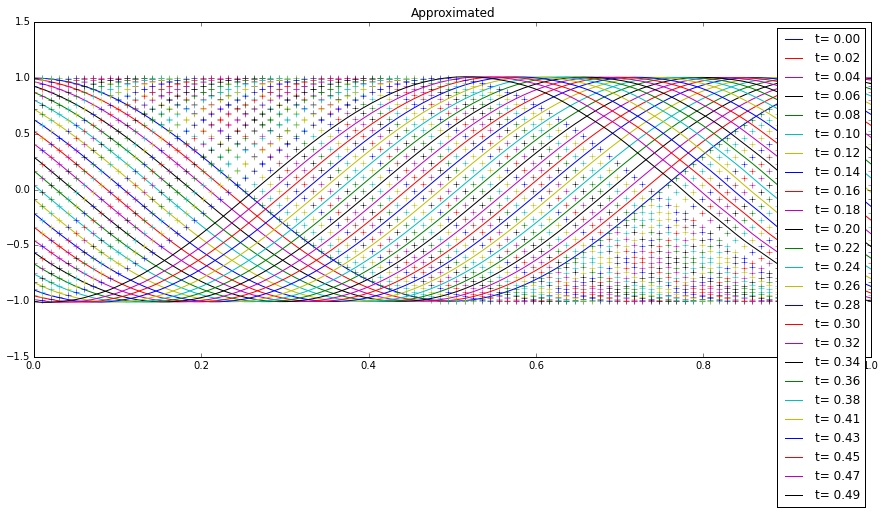

In [498]:
#
# avancement en temps u(x,t)
#
cfl = 0.1
L    = 1. # x= [0, L]
N    = 100 #Gridpoints
tend = .5 #Final time step
V = 1.
dx = L/(N-1.)
dt = (cfl*dx)/V
nt = int(tend/dt)+1

print "CFL=%5.2f tend=%4.1f --> %i iteratiobns en temps"%(cfl,tend,nt)
t=0. ; u=np.copy(T0)
plt.figure(figsize=(15, 6))
for i in range(0,nt):
    up=np.roll(u,-1)
    um=np.roll(u,1)
    u = u - 0.5*cfl*(um- up )
    t=t+dt 
    if (i % 20 == 0):  #Plot every 500 interations
        st="t=%5.2f"%t
        uexacte= np.cos(((2*np.pi)/L)*(x-V*t))
        plt.plot(x,u,label=st)
        plt.plot(x,uexacte,'+')
        plt.title('Approximated')
        plt.legend()

We notice that this method is unconditionally unstable. Even with a very small CFL we can't get a good numerical result. 

## Upwind

We again use a *Upwind schema*. In our case again now the $\text{CLF} = \frac{V \Delta t}{\Delta x}$. Where we know that V is positive. This scheme depends on the sign of the speed. In this case where is positive we get for $u^m_{i+1}$:


$$u^m_{i+1}= u^m _i  - \text{CFL} \left ( u^{m}_i - u^{m-i}_i \right ) $$


We know that the schema is stable if $\text{CFL} < 1$

CFL= 0.40 tend= 0.5 --> 124 iterations en temps


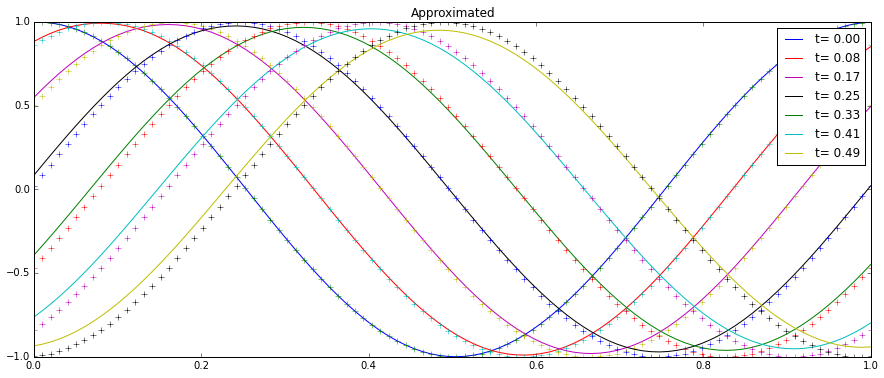

In [482]:
cfl = 0.4
L    = 1. # x= [0, L]
N    = 100 #Gridpoints
tend = .5 #Final time step
V = 1.
dx = L/(N-1.)
dt = (cfl*dx)/V
nt = int(tend/dt)+1
print "CFL=%5.2f tend=%4.1f --> %i iteratiobns en temps"%(cfl,tend,nt)

t=0. ; u=np.copy(T0)
plt.figure(figsize=(15, 6))
clf=.1
for i in range(0,nt):
    uold = u
    #u= cfl*np.roll(uold,-1)+(1-2*cfl)*uold+ cfl*np.roll(uold,1)
    uexacte= np.cos(((2*np.pi*x)/L)*(x-V*dt))
    up=np.roll(u,-1)
    um=np.roll(u,1)
    u= u - cfl*(u-um)
    t=t+dt 
    if (i % 20 == 0):  #Plot every 500 interations
        st="t=%5.2f"%t
        uexacte= np.cos(((2*np.pi)/L)*(x-V*t))
        plt.plot(x,u,label=st)
        plt.plot(x,uexacte,'+')
        plt.title('Approximated')
        plt.legend()
        


## Lax-Friedrichs

Again we notice that the CFL need to be less than 1. Like the upwind one is conditionally stable. 


$$u^m_{i+1}= \frac{\text{1}}{2} \left ( u^{m+1}_i + u^{m-i}_i \right )  - \frac{\text{CFL}}{2} \left ( u^{m+1}_i - u^{m-i}_i \right ) $$


CFL= 0.40 tend= 0.5 --> 124 iterations en temps


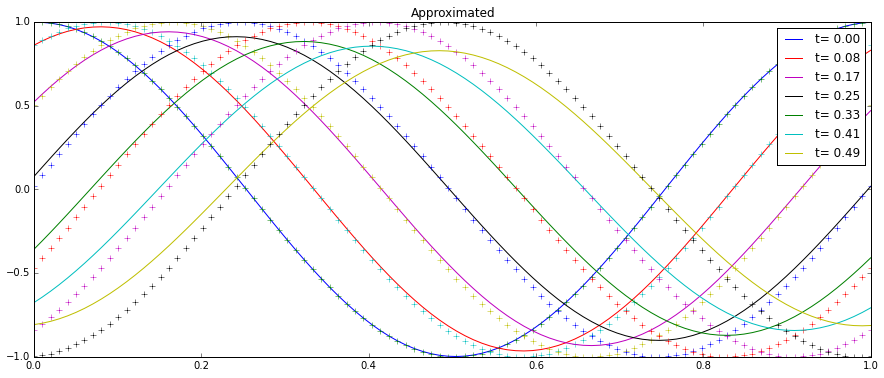

In [483]:
cfl = .4
L    = 1. # x= [0, L]
N    = 100 #Gridpoints
tend = 0.5 #Final time step
V = 1.
dx = L/(N-1.)
dt = (cfl*dx)/V
nt = int(tend/dt)+1
print "CFL=%5.2f tend=%4.1f --> %i iteratiobns en temps"%(cfl,tend,nt)

t=0. ; u=np.copy(T0)
plt.figure(figsize=(15, 6))
clf=.1
for i in range(0,nt):
    up=np.roll(u,-1)
    um=np.roll(u,1)
    u=0.5* (up+um) - 0.5*cfl*(up-um)
    t=t+dt 
    if (i % 20 == 0):  #Plot every 500 interations
        st="t=%5.2f"%t
        uexacte= np.cos(((2*np.pi)/L)*(x-V*t))
        plt.plot(x,u,label=st)
        plt.plot(x,uexacte,'+')
        plt.title('Approximated')
        plt.legend()
        


## Numerical Difussion 

We notice that when we plot the solution for both scheme that the one obtained with the Lax-Friedrichs is more diffusive than the Upwind one.

## CFL

In the Upwind and the Lax we need a CFL smaller than 1. This means that again this will determine our $\Delta t$. Again we solve this problem using a Implicit Schema

# Implicit Schema

We again an implicit centered scheme of Crank-Nicolson's type. In this case the boundaries conditions are periodic. We have:




 $$ \frac{f_{i+1}^{m}-f_{i}^{m}}{\Delta t} =  \frac{-V}{2}\left[\frac{f_{i+1}^{m+1}-f_{i+1}^{m-1}}{2 \Delta x}+\frac{f_{i}^{m+1}- f_{i}^{m-1}}{2 \Delta x}\right]$$
 






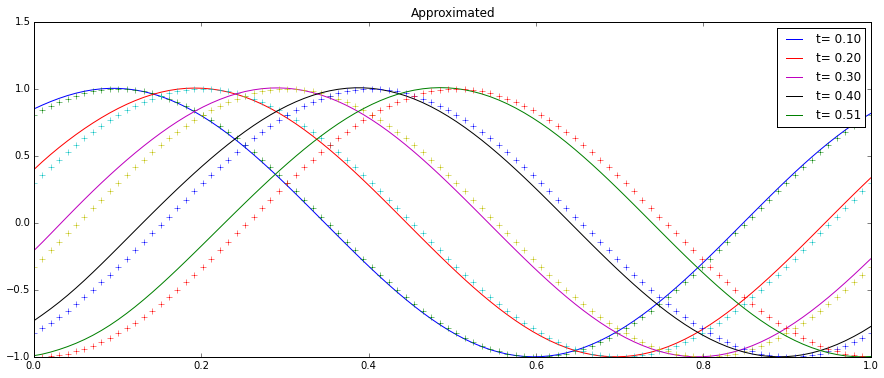

In [484]:
from tridag2 import cyclic
cfl = 10.
L    = 1. # x= [0, L]
N    = 100 #Gridpoints
tend = 0.5 #Final time step
V = 1.
dx = L/(N-1.)
dt = (cfl*dx)/V
nt = int(tend/dt)+1


# Construction de la matricea tridiagonale du systeme
A=-0.25*cfl*np.ones(N)
B=  np.ones(N)
C = 0.25*cfl *np.ones(N)
alpha=0.25*cfl
beta= - 0.25*cfl


t=0. ; u=np.copy(T0)
plt.figure(figsize=(15, 6))
for i in range(1,nt+1):
    up=np.roll(u,-1)
    um=np.roll(u,1)
    RHS = u-0.25*cfl*(up-um)
    u=cyclic(A,B,C,alpha,beta,RHS)
    t=t+dt 
    if (i % 1 == 0):  #Plot every 500 interations
        st="t=%5.2f"%t
        uexacte= np.cos(((2*np.pi)/L)*(x-V*t))
        plt.plot(x,u,label=st)
        plt.plot(x,uexacte,'+')
        plt.title('Approximated')
        plt.legend()
        

## Remarks

This method is unconditionally stable. We can have a very large CFL but we have a delay on the phase. 

In [485]:
from IPython.core.display import HTML
def css_styling():
    styles = open("custom2.css", "r").read()
    return HTML(styles)
css_styling()